# Projects in Advanced Machine Learning HW#1 - Paarth Malkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Ignore Warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\paart_000\Documents\Columbia\Advanced Machine Learning/MLHW1_World_Regions_csv.csv")
print (data.head())
print ('---------------------------------------------------------------------------------')
print(data.describe())

  Happiness_level  Happiness_ordinal Country or region Abbreviation Continent  \
0       Very High                  5           Finland          FIN    Europe   
1       Very High                  5           Denmark          DNK    Europe   
2       Very High                  5            Norway          NOR    Europe   
3       Very High                  5           Iceland          ISL    Europe   
4       Very High                  5       Netherlands          NLD    Europe   

         Subregion  GDPcapita  SocialSupport  HealthyLifeExpect  \
0  Northern Europe      1.340          1.587              0.986   
1  Northern Europe      1.383          1.573              0.996   
2  Northern Europe      1.488          1.582              1.028   
3  Northern Europe      1.380          1.624              1.026   
4   Western Europe      1.396          1.522              0.999   

   FreedomLifeChoices  Generosity  PerceptionsCorruptions  
0               0.596       0.153                 

### 1. Explore bivariate results (Use visualizations!). Describe any relationships you see between particular features and the target variable

In [4]:
# OLS Regression between social support (ind. variable) and happiness level (dep. variable)

socsupport_happiness_lr = smf.ols(formula = "Happiness_ordinal ~ SocialSupport", data=data).fit()
print (socsupport_happiness_lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Happiness_ordinal   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     184.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.69e-28
Time:                        23:00:36   Log-Likelihood:                -213.66
No. Observations:                 156   AIC:                             431.3
Df Residuals:                     154   BIC:                             437.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2204      0.320     -3.811

##### To explore a bivariate result, I ran an OLS regression between the independent variable of social support and the target variable of happiness. In the dataset, I created another column where I set ordinal values that correspond the happiness level. 5 corresponds to "very high" and 1 corresponds to "very low." I hypothesized that as levels of social support go up, happiness increases. According to the regression results, I was correct in my findings. As social support goes up by 1, happiness goes up by 3.497. This is highly statistically significant given the p-score of 0. This means that there is 0% chance this relationship exists randomly. Additionally, the model fits the data relatively well, with an r-squared value of .545. 

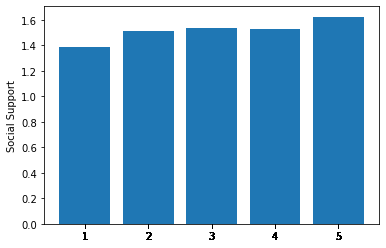

In [5]:
# Bar chart of Happiness (1 = very low, 5 = very high) and Social Support

plt.bar(data.Happiness_ordinal, data.SocialSupport)
plt.xticks(data.Happiness_ordinal)
plt.ylabel("Social Support")
plt.show()

##### As seen in the bar chart above, countries with "very high" levels of happines (5) enjoy more social support than countries with "very low" levels of happiness, who have the lowest levels of social support. This suggests that the more social support a country provides it's citizens, the happier the citizens. 

In [6]:
# OLS Regression between GDP per capita (ind. variable) and happiness level (dep. variable)

GDPcapita_happiness_lr = smf.ols(formula = "Happiness_ordinal~ GDPcapita", data=data).fit()
print (GDPcapita_happiness_lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Happiness_ordinal   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     255.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.74e-34
Time:                        23:00:40   Log-Likelihood:                -198.97
No. Observations:                 156   AIC:                             401.9
Df Residuals:                     154   BIC:                             408.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4652      0.174      2.677      0.0

##### ##### To another bivariate result, I ran an OLS regression between the independent variable of GDP per capita and the dependent variable of happiness. I hypothesized that as GDP per capita goes up, happiness increases. According to the regression results, I was correct in my findings. As GDP per capita goes up by 1, happiness goes up by 2.808. This is highly statistically significant given the p-score of 0. This means that there is 0% chance this relationship exists randomly. Additionally, the model fits the data well, with an r-squared value of .624. 

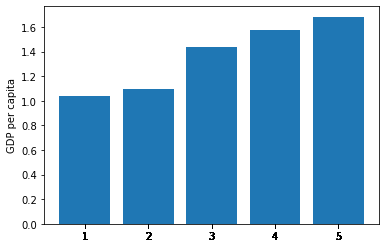

In [7]:
# Bar chart of Happiness (1 = very low, 5 = very high) and GDP per capita

plt.bar(data.Happiness_ordinal, data.GDPcapita)
plt.xticks(data.Happiness_ordinal)
plt.ylabel("GDP per capita")
plt.show()

##### As seen in the bar chart above, countries with higher happiness levels enjoy significantly higher GDP per capita than countries with lower levels of happiness. This suggests that the more wealth a country has, the happier it's citizens. 

In [8]:
# Splitting the data into target and feature variables to prepare for one hot encoding and subsequent prediction models

X = data.drop(["Happiness_level", "Happiness_ordinal", "Country or region", "Abbreviation", "Continent"], axis = 1)
y = data["Happiness_level"]

print (X.shape)
print (X.head())
print (y.shape)
print (y.head())

# Train, test, splitting of target and feature variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)

(156, 7)
         Subregion  GDPcapita  SocialSupport  HealthyLifeExpect  \
0  Northern Europe      1.340          1.587              0.986   
1  Northern Europe      1.383          1.573              0.996   
2  Northern Europe      1.488          1.582              1.028   
3  Northern Europe      1.380          1.624              1.026   
4   Western Europe      1.396          1.522              0.999   

   FreedomLifeChoices  Generosity  PerceptionsCorruptions  
0               0.596       0.153                   0.393  
1               0.592       0.252                   0.410  
2               0.603       0.271                   0.341  
3               0.591       0.354                   0.118  
4               0.557       0.322                   0.298  
(156,)
0    Very High
1    Very High
2    Very High
3    Very High
4    Very High
Name: Happiness_level, dtype: object
(117, 7)
(117,)


In [9]:
# Developing preprocessing pipelines 

numeric_features=X.columns.tolist()
numeric_features.remove('Subregion')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Subregion']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fitting preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 

pickle.dump(prediction_input_preprocessor, open( "preprocessor.pkl", "wb" ) )

# Looking at post-processed shapes
print (prediction_input_preprocessor.transform(X_train).shape)
print (pd.get_dummies(y_train).shape)

# Assigning processed X and y train data to objects

processed_X_train = prediction_input_preprocessor.transform(X_train)
processed_y_train = pd.get_dummies(y_train)

(117, 20)
(117, 5)


### 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection. Explain any meaningful findings

In [10]:
# Lasso regression to observe predictive variables with target variable of happiness

X_predictive = data.drop(["Happiness_level", "Happiness_ordinal", "Country or region", "Abbreviation", "Continent", "Subregion"], axis = 1)
y_predictive = data["Happiness_ordinal"]

vari_lasso = Lasso(alpha = 0, normalize = True)
vari_lasso_coef = vari_lasso.fit(X_predictive, y_predictive).coef_
print(vari_lasso_coef)
print(vari_lasso_coef.shape)

[1.07871879 0.93739894 1.83191933 1.85504487 0.21958188 0.26051596]
(6,)


##### Above, I ran an lasso regression to determine which feature variables are most predictive of the target variable. The features are: GDP per capita, social support, healthy life expectancy, freedom of life choices, generosity, and perceptions of corruption. The target variable is the ordinal ranking of happiness in a range of 1 to 5. 5 corresponds to "very high" happiness and 1 corresponds to "very low" happiness. According to the lasso regression, the features that are most predictive, in order from greatest to least, are: 1) freedom of life choices, 2) healthy life expectancy, 3) GDP per capita, 4) social support, 5) perceptions of corruption, 6) generosity. 

### 3. Run at least three prediction models to try to predict World Happiness well.

In [11]:
# KNN classifier with gridsearch and 10 fold CV

param_grid = {"n_neighbors": np.arange(1, 50)}
knnc = KNeighborsClassifier()
knnc_gscv = GridSearchCV(knnc, param_grid, cv = 10)
knnc_gscv.fit(processed_X_train, processed_y_train)

print ("Best gridsearch hyperparameter value:", knnc_gscv.best_params_)
print ("KNN classifier gridsearch cross-validation score:", knnc_gscv.best_score_)
print ("KNN classifier test data accuracy:", knnc_gscv.score(prediction_input_preprocessor.transform(X_test), pd.get_dummies(y_test)))

Best gridsearch hyperparameter value: {'n_neighbors': 1}
KNN classifier gridsearch cross-validation score: 0.5213675213675214
KNN classifier test data accuracy: 0.3076923076923077


##### Above, I ran a KNN classifier model with gridsearch and 10 fold CV. I set the n_neighbors parameters grid range from 1 to 50. After running the model with 10 folds, the best model returned used 1 neighbor as the hyperparameter. The best CV score is .521 and the test-set accuracy is .308.

In [12]:
# KNN classifier with 3 neighbors and 10 fold cv
# (NOTE: I'm an extra KNN model b/c I want to see the scores if I set the n_neighbors to 3)

knnc_2 = KNeighborsClassifier(n_neighbors = 3).fit(processed_X_train, processed_y_train)
knn_cv_scores = cross_val_score(knnc_2, processed_X_train, processed_y_train, cv =10)
print ("KNN classifier w/3 neighbors mean CV score:", np.mean(knn_cv_scores))
print ("KNN classifier w/3 neighbors test data accuracy:", knnc_2.score(prediction_input_preprocessor.transform(X_test), pd.get_dummies(y_test)))

KNN classifier w/3 neighbors mean CV score: 0.4446969696969697
KNN classifier w/3 neighbors test data accuracy: 0.38461538461538464


##### Above, I developed another KNN classifier model, this time relinquishing the gridsearch and setting the neighbors value to 3. I did so because in the previous KNN model, the gridsearch returned the best hyperparameter as 1, and I wanted to see if it would return a higher accuracy with more neighbors. The best CV score decreased to .445 however the test-set accuracy increased to .385. 

In [13]:
# Random forest classifier with gridsearch and 10 fold CV

param_grid_2 = {"n_estimators": np.arange(1, 100)}
rfc = RandomForestClassifier()
rfc_gscv = GridSearchCV(rfc, param_grid_2, cv=10)
rfc_gscv.fit(processed_X_train, processed_y_train)

print ("Best gridsearch hyperparameter value:", rfc_gscv.best_params_)
print ("Random forests classifier gridsearch cross-validation score:", rfc_gscv.best_score_)
print ("Random forests classifier test data accuracy:", rfc_gscv.score(prediction_input_preprocessor.transform(X_test), pd.get_dummies(y_test)))

Best gridsearch hyperparameter value: {'n_estimators': 1}
Random forests classifier gridsearch cross-validation score: 0.5128205128205128
Random forests classifier test data accuracy: 0.28205128205128205


##### Above, I ran a random forest model with gridsearch and 10 fold CV. I set the n_estimators hyperparameter range from 1 to 100. The best model returned used an n_estimators value of 1. The best CV score is .513 and the test-set accuracy is .282. 

In [14]:
# Logistic regression with gridsearch and 10 fold CV

param_grid_3 = {"C": np.arange(1, 1000)}
logreg = LogisticRegression()
log_gscv = GridSearchCV(logreg, param_grid_3, cv=5)
log_gscv.fit(processed_X_train, y_train)
log_gscv.best_score_

print ("Best gridsearch hyperparameter value:", log_gscv.best_params_)
print ("Logistic regression gridsearch cross-validation score:", log_gscv.best_score_)
print ("Logistic regression test data accuracy:", log_gscv.score(prediction_input_preprocessor.transform(X_test), y_test))

Best gridsearch hyperparameter value: {'C': 1}
Logistic regression gridsearch cross-validation score: 0.5726495726495726
Logistic regression test data accuracy: 0.38461538461538464


##### Above, I ran a logistic regression model with gridsearch and 10 fold CV. I set the C hyperparameter range from 1 to 1000. The best model returned used a C value of 1. The best CV score is .573 and the test-set accuracy is .385.

##### Of every model I ran, the logistic regression with a hyperparameter of 1 and 10 folds returned the highest accuracy. I has a CV score of .573 and test-set accuracy of .385. 

In [15]:
# Prediction of target data using prior logistic regression model

y_log_gscv_pred=log_gscv.predict(prediction_input_preprocessor.transform(X_test))

### Posting to World Happiness AI Model Share Leaderboard

In [17]:
# # Preparing model results for sharing

# # prediction_index=logreg.predict_classes(prediction_input_preprocessor.transform(X_test))

# #Now lets run some code to get keras to return the label rather than the index...

# # get labels from one hot encoded y_train data
# labels=processed_y_train.columns

# # Function to use to return label from column index location
# def index_to_label(labels,index_n): 
#     return labels[index_n]
    
# # Example: return label at predicted index location 1
# index_to_label(labels,1)

# # Iterate through all predicted indices using map method

# predicted_labels=list(map(lambda x: labels[x], y_pred))
# print(predicted_labels)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro")
        precision_eval = precision_score(y_true, y_pred,average="macro")
        recall_eval = recall_score(y_true, y_pred,average="macro")
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

model_eval_metrics(y_test,y_log_gscv_pred,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.384615,0.368218,0.41859,0.408333,0,0,0,0


In [34]:
pip install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true

  Using cached https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true
  Stored in directory: C:\Users\paart_000\AppData\Local\pip\Cache\wheels\31\8d\ac\09cb6ef7374ec79e02843c347195e5478144006b11def6799a
Successfully built aimodelshare
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install onnxruntime

In [27]:
pip install skl2onnx

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Converting from sklearn to onnx
import os

if not os.path.exists('mymodel.onnx'):
    from skl2onnx import convert_sklearn
    from skl2onnx.common.data_types import FloatTensorType
    initial_type = [('mymodel.onnx', FloatTensorType([None, 4]))]
    onx = convert_sklearn(log_gscv, initial_types=initial_type)
    with open("mymodel.onnx", "wb") as f:
        f.write(onx.SerializeToString())
        
# from skl2onnx import convert_sklearn
# from skl2onnx.common.data_types import FloatTensorType
# initial_type = [('float_input', FloatTensorType([None, 4]))]
# onx = convert_sklearn(log_gscv, initial_types=initial_type)
# with open("rf_iris.onnx", "wb") as f:
#     f.write(onx.SerializeToString())

In [46]:
# Saving logistic regression model to pkl file

aws_key_password_region = pickle.load(open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) ) 
# pickle.dump(log_gscv, open( "rff_model.pkl", "wb" ) )

FileNotFoundError: [Errno 2] No such file or directory: 'worldhappiness_modelsubmission_keys.pkl'

In [48]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = 
password = 

region='us-east-1'
model_filepath="mymodel.onnx"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open("worldhappiness_modelsubmission_keys.pkl", "wb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

UnsupportedOperation: read